## Step 1 Data understanding and Exploration



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
house=pd.read_csv("train.csv",na_values="NAN",index_col=0)

In [3]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.shape

(1460, 80)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


`USING SWEETVIZ PACKAGE FOR CHECKING MISSING VALUES AND HISTOGRAMS`

In [7]:
sweet_report = sv.analyze(house,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Step 2 Data cleaning

###### segmenting the features into categorical and continuous variables

In [8]:
Unordered_categorical_var=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                            'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating',
                           'CentralAir','Electrical','Functional','GarageType','PavedDrive','Fence','SaleType','SaleCondition']
Ordered_categorical_var=['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                        'HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','MiscFeature']
continuous_var=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
         'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
               'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']
Date_var=['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

In [9]:
####checking length of each feature and adding to check all the features are segmented
len(Unordered_categorical_var)+len(Ordered_categorical_var)+len(continuous_var)+len(Date_var)

80

In [10]:
##replacing the meaningful NaN values by 'NONE' which are automatically considered NaN while importing
NA_VAR=['Alley','BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond','PoolQC','BsmtExposure','GarageFinish',
        'BsmtFinType1','BsmtFinType2','GarageType','Fence','MiscFeature']
for i in NA_VAR:
    house[i]=house[i].replace(np.NaN,'NONE')

In [11]:
house['MasVnrType']=house['MasVnrType'].replace('None','NONE')

In [12]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### DATA VISUALISATION

`plotting the graphs between Unordered_categorical_var and sale price to check effect of each category on saleprice of the house`

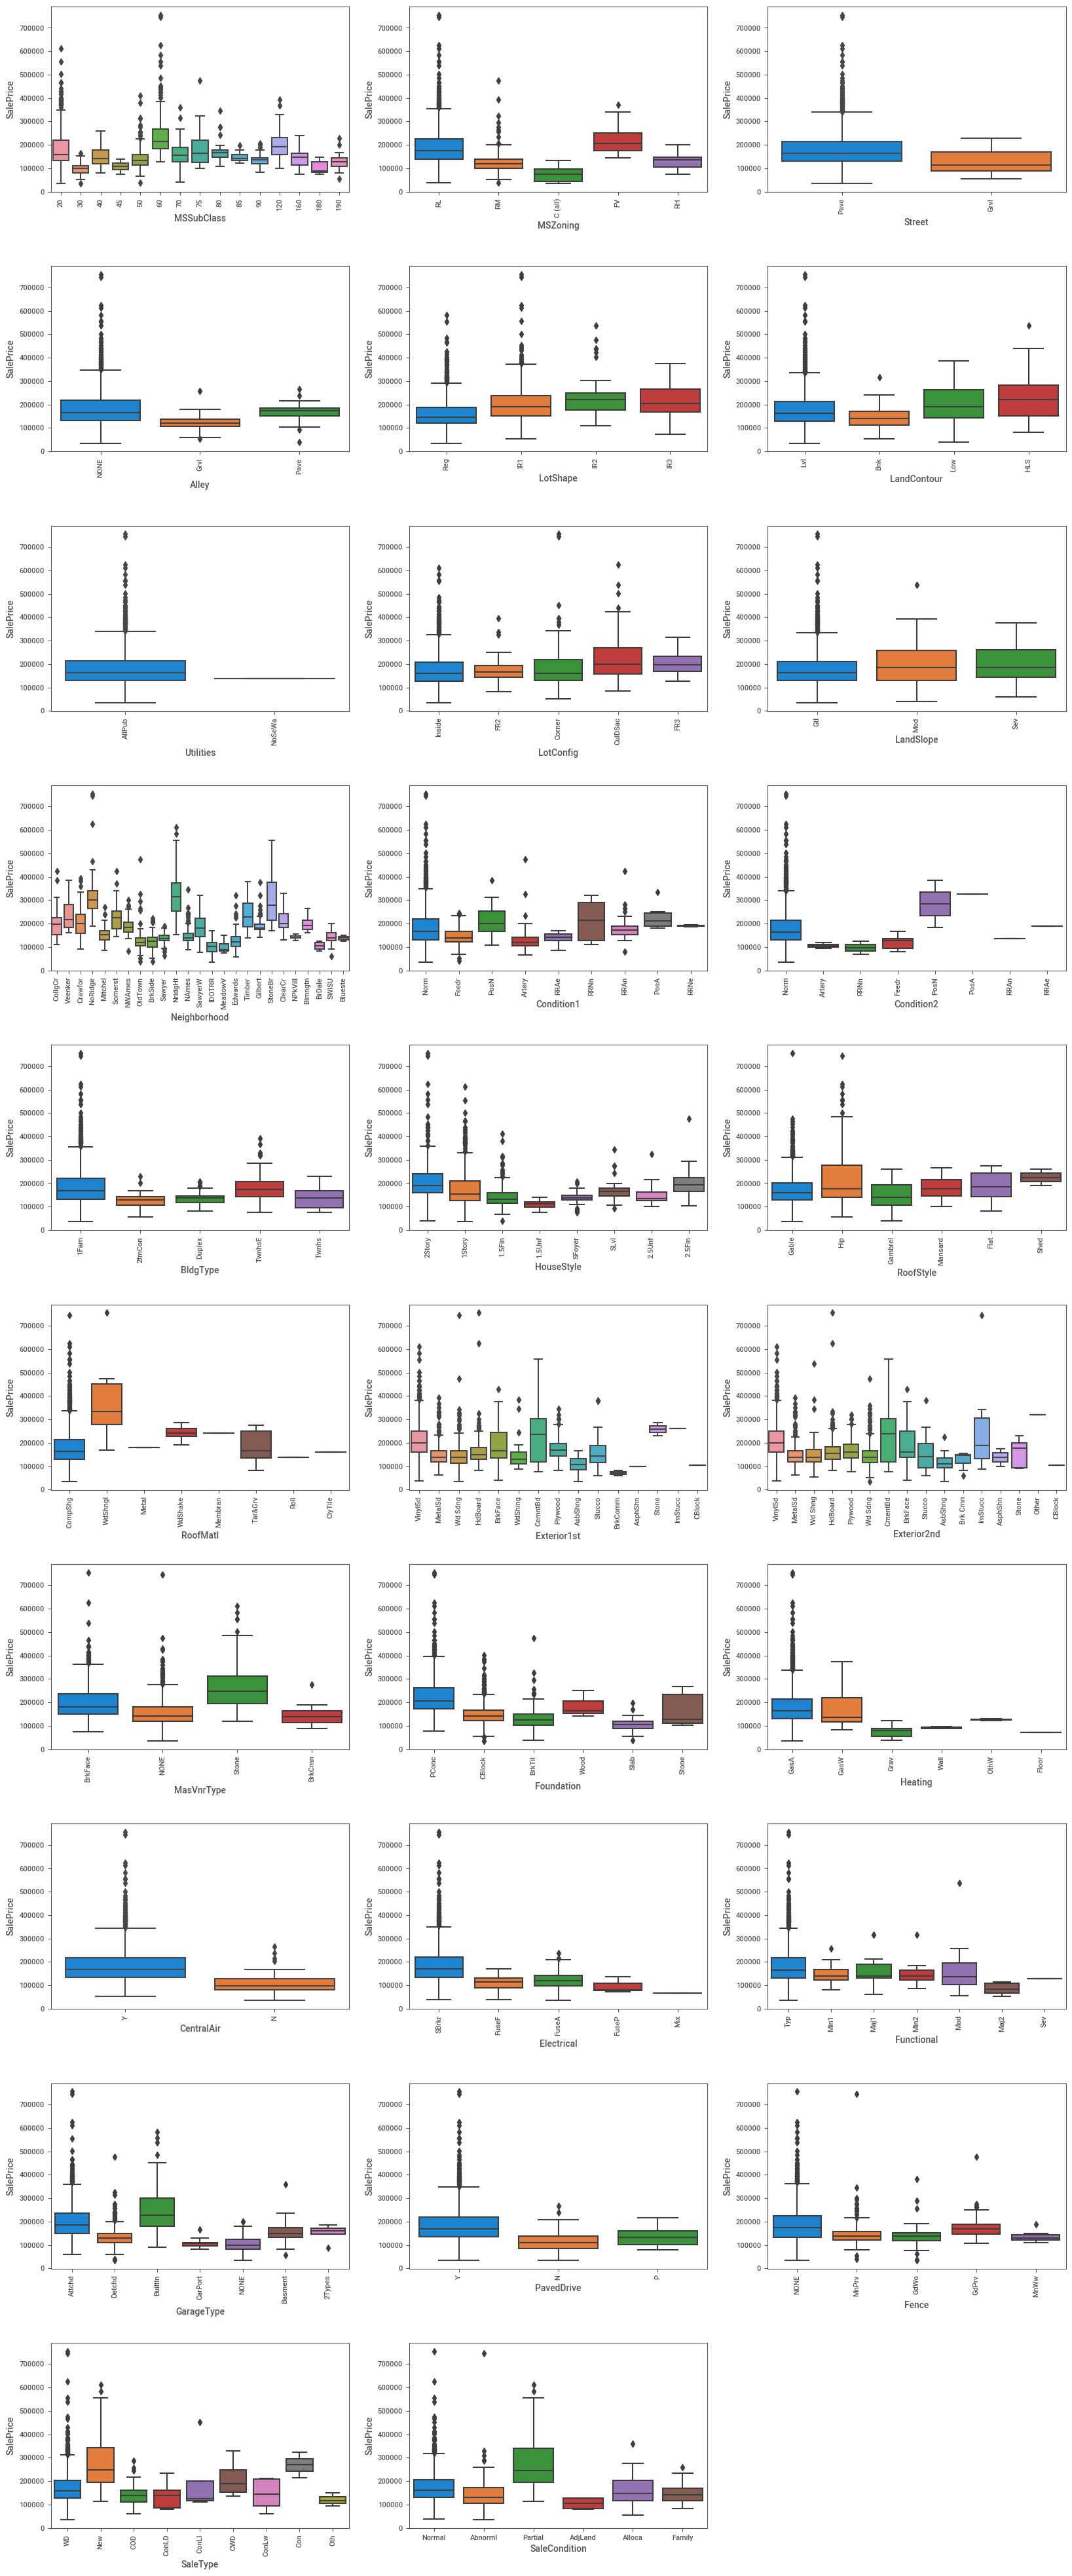

In [13]:
plt.figure(figsize=(20,50))

for i in Unordered_categorical_var:
    plt.xticks(rotation=90)
    plt.subplot(10,3,Unordered_categorical_var.index(i)+1)
    plt.subplots_adjust(hspace=0.4)
    sns.boxplot(data=house,x=i,y='SalePrice')

`plotting the graphs between Ordered_categorical_var and sale price to check effect of each category on saleprice of the house`

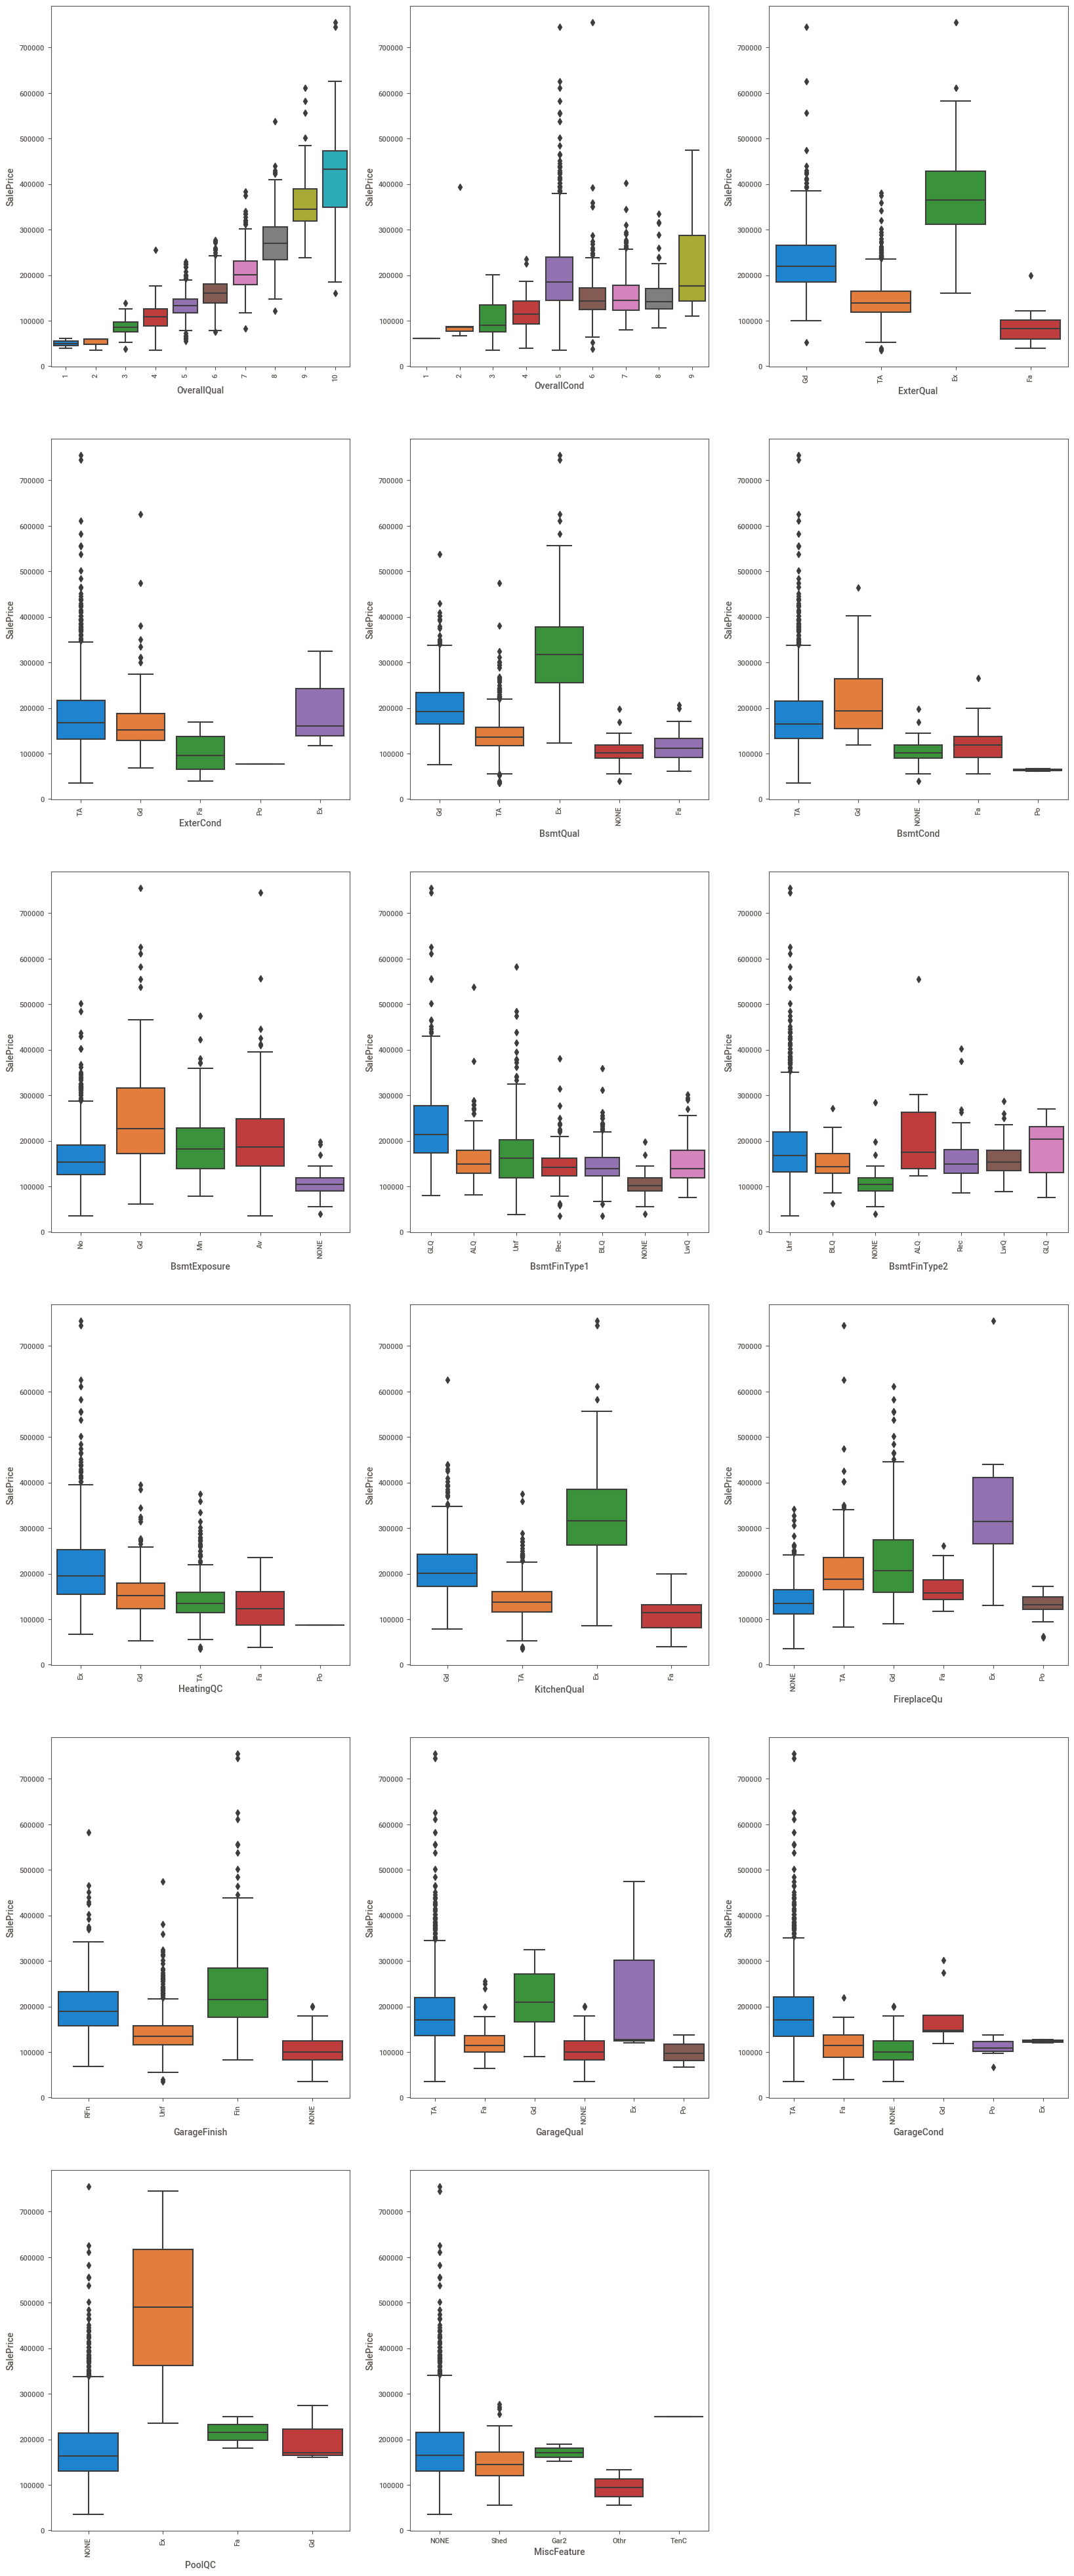

In [14]:
plt.figure(figsize=(20,50))

for i in Ordered_categorical_var:
    plt.xticks(rotation=90)
    plt.subplot(6,3,Ordered_categorical_var.index(i)+1)
    plt.subplots_adjust(hspace=0.2)
    sns.boxplot(data=house,x=i,y='SalePrice')

`finding the corelation between continuous variable and plotting the heat map`

In [15]:
continuous_var_df=house[continuous_var]
continuous_var_df.corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,...,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.038469,0.004779,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,-0.094480,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


<AxesSubplot:>

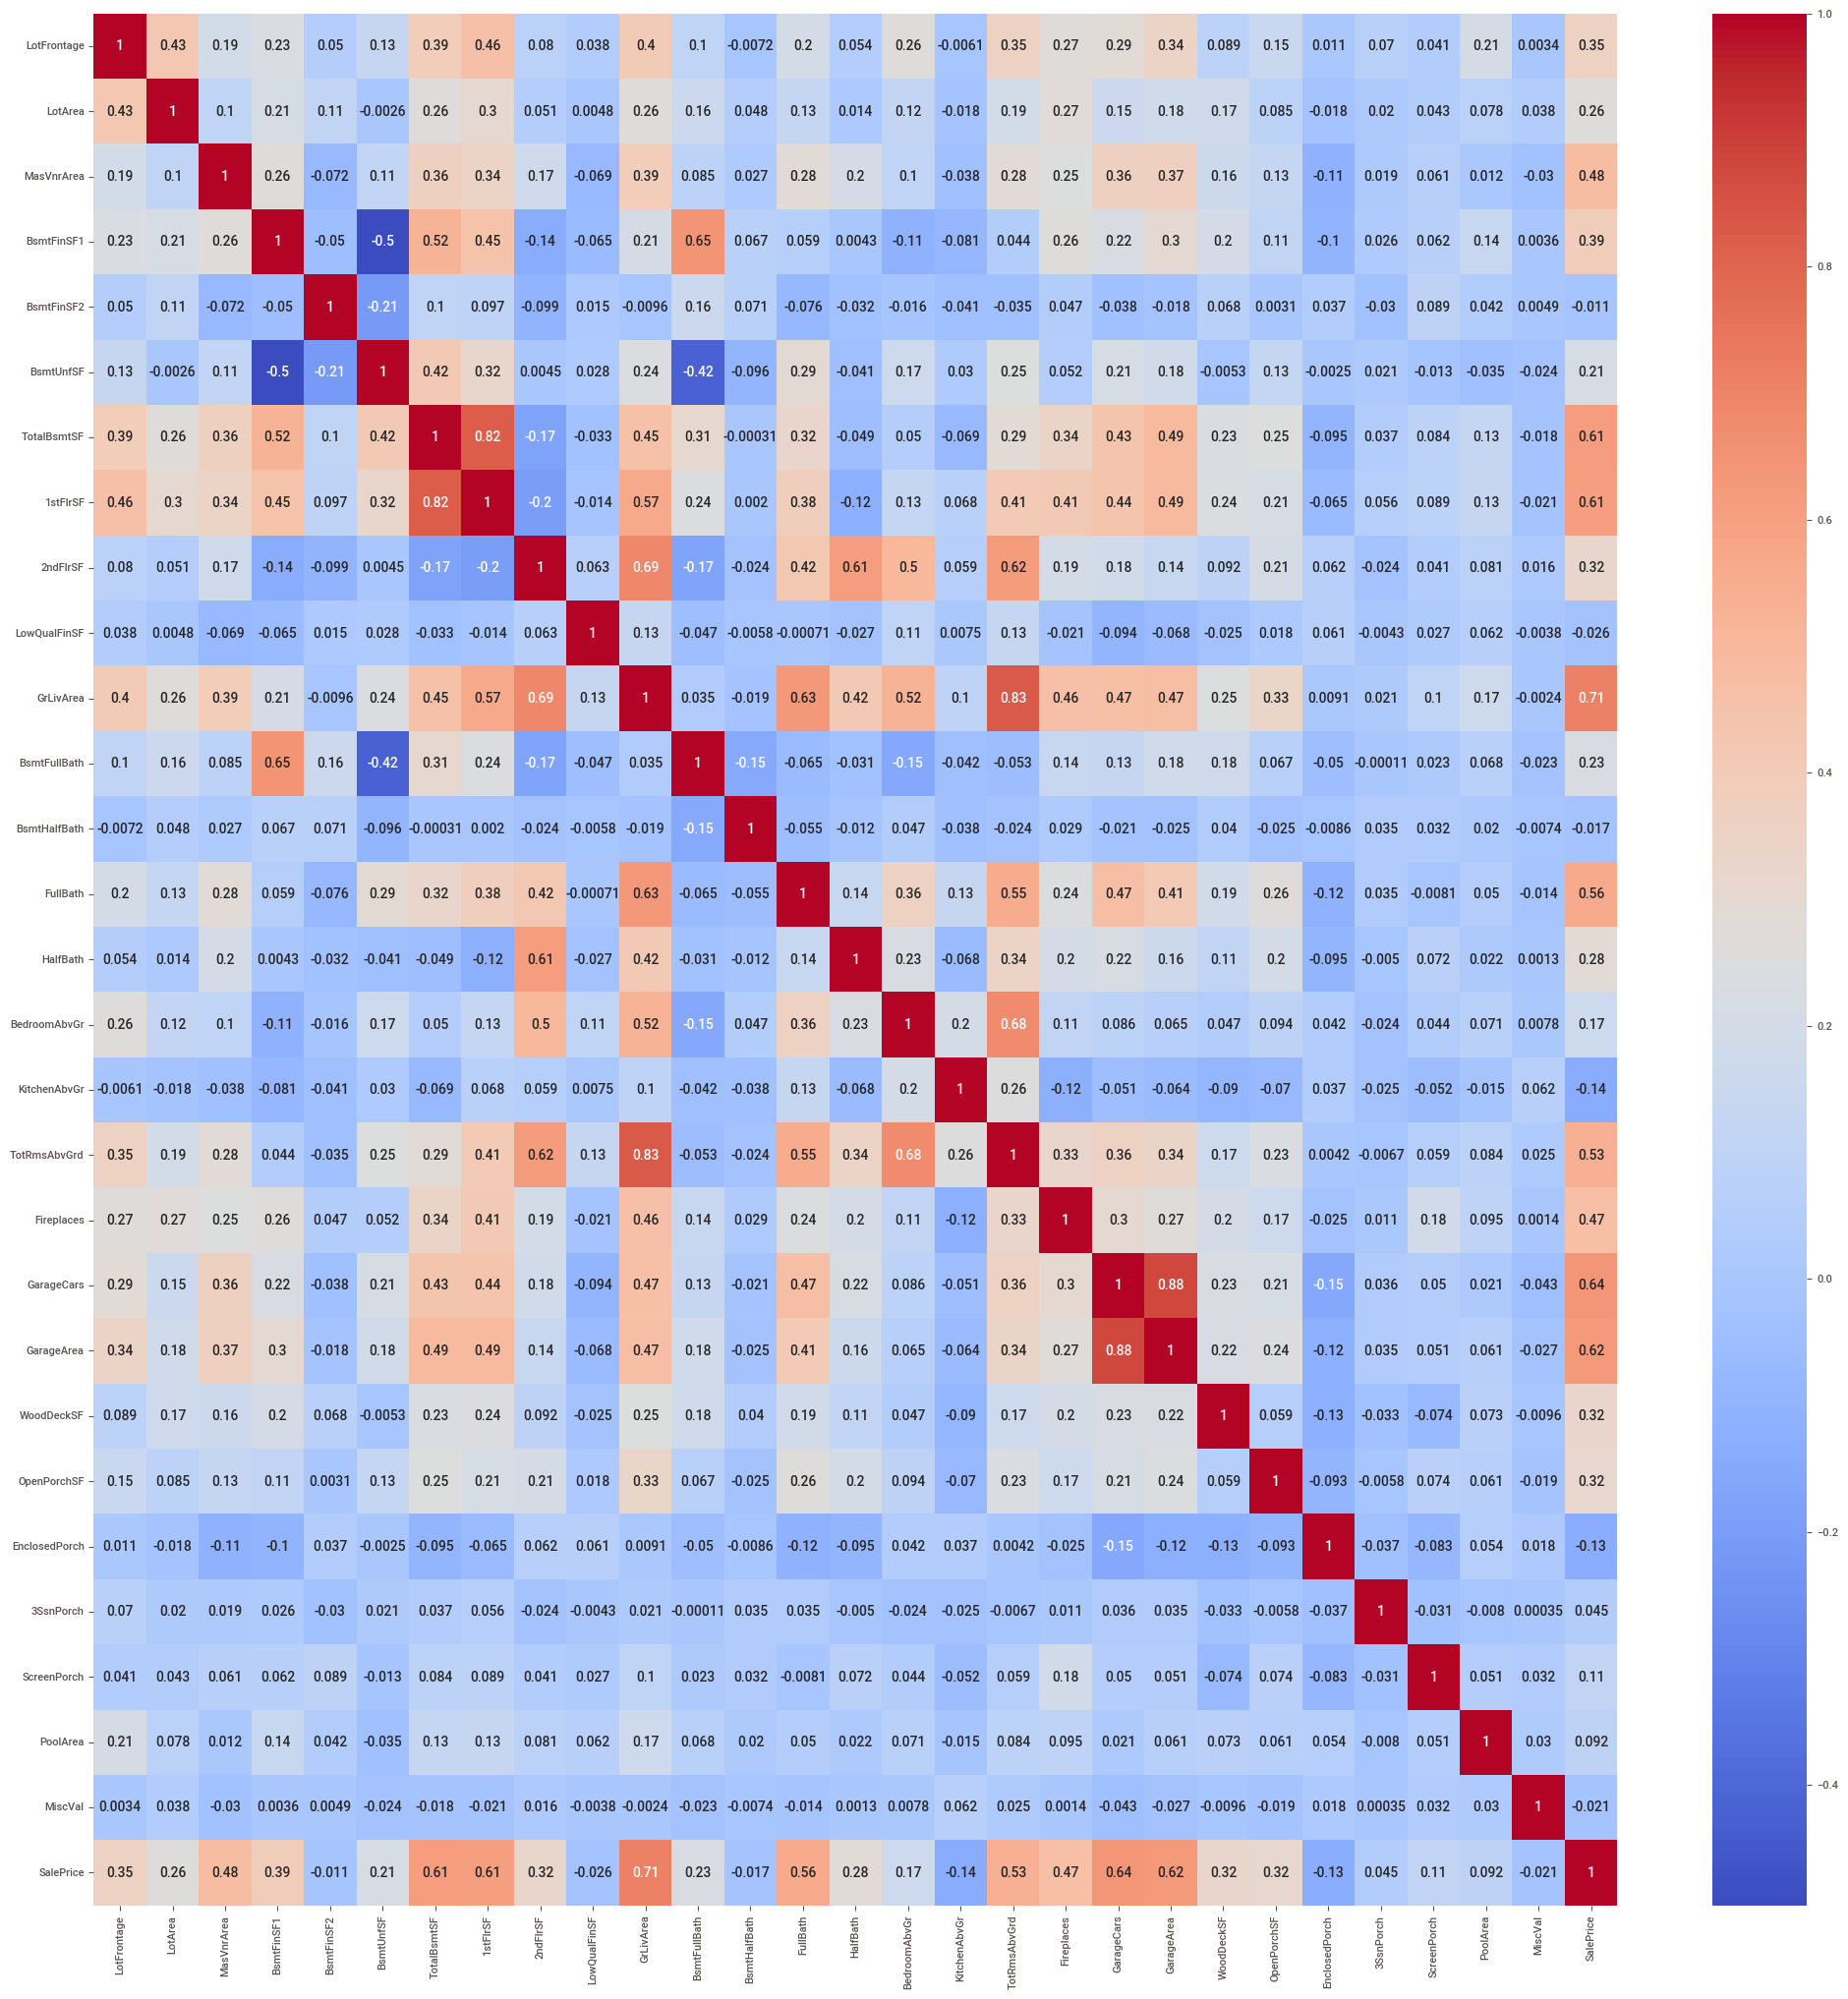

In [16]:
plt.figure(figsize=(25,25))
sns.heatmap(continuous_var_df.corr(),annot=True,cmap= "coolwarm")

`plotting the graphs between continuous variable and sale price to check effect of each category on saleprice of the house`

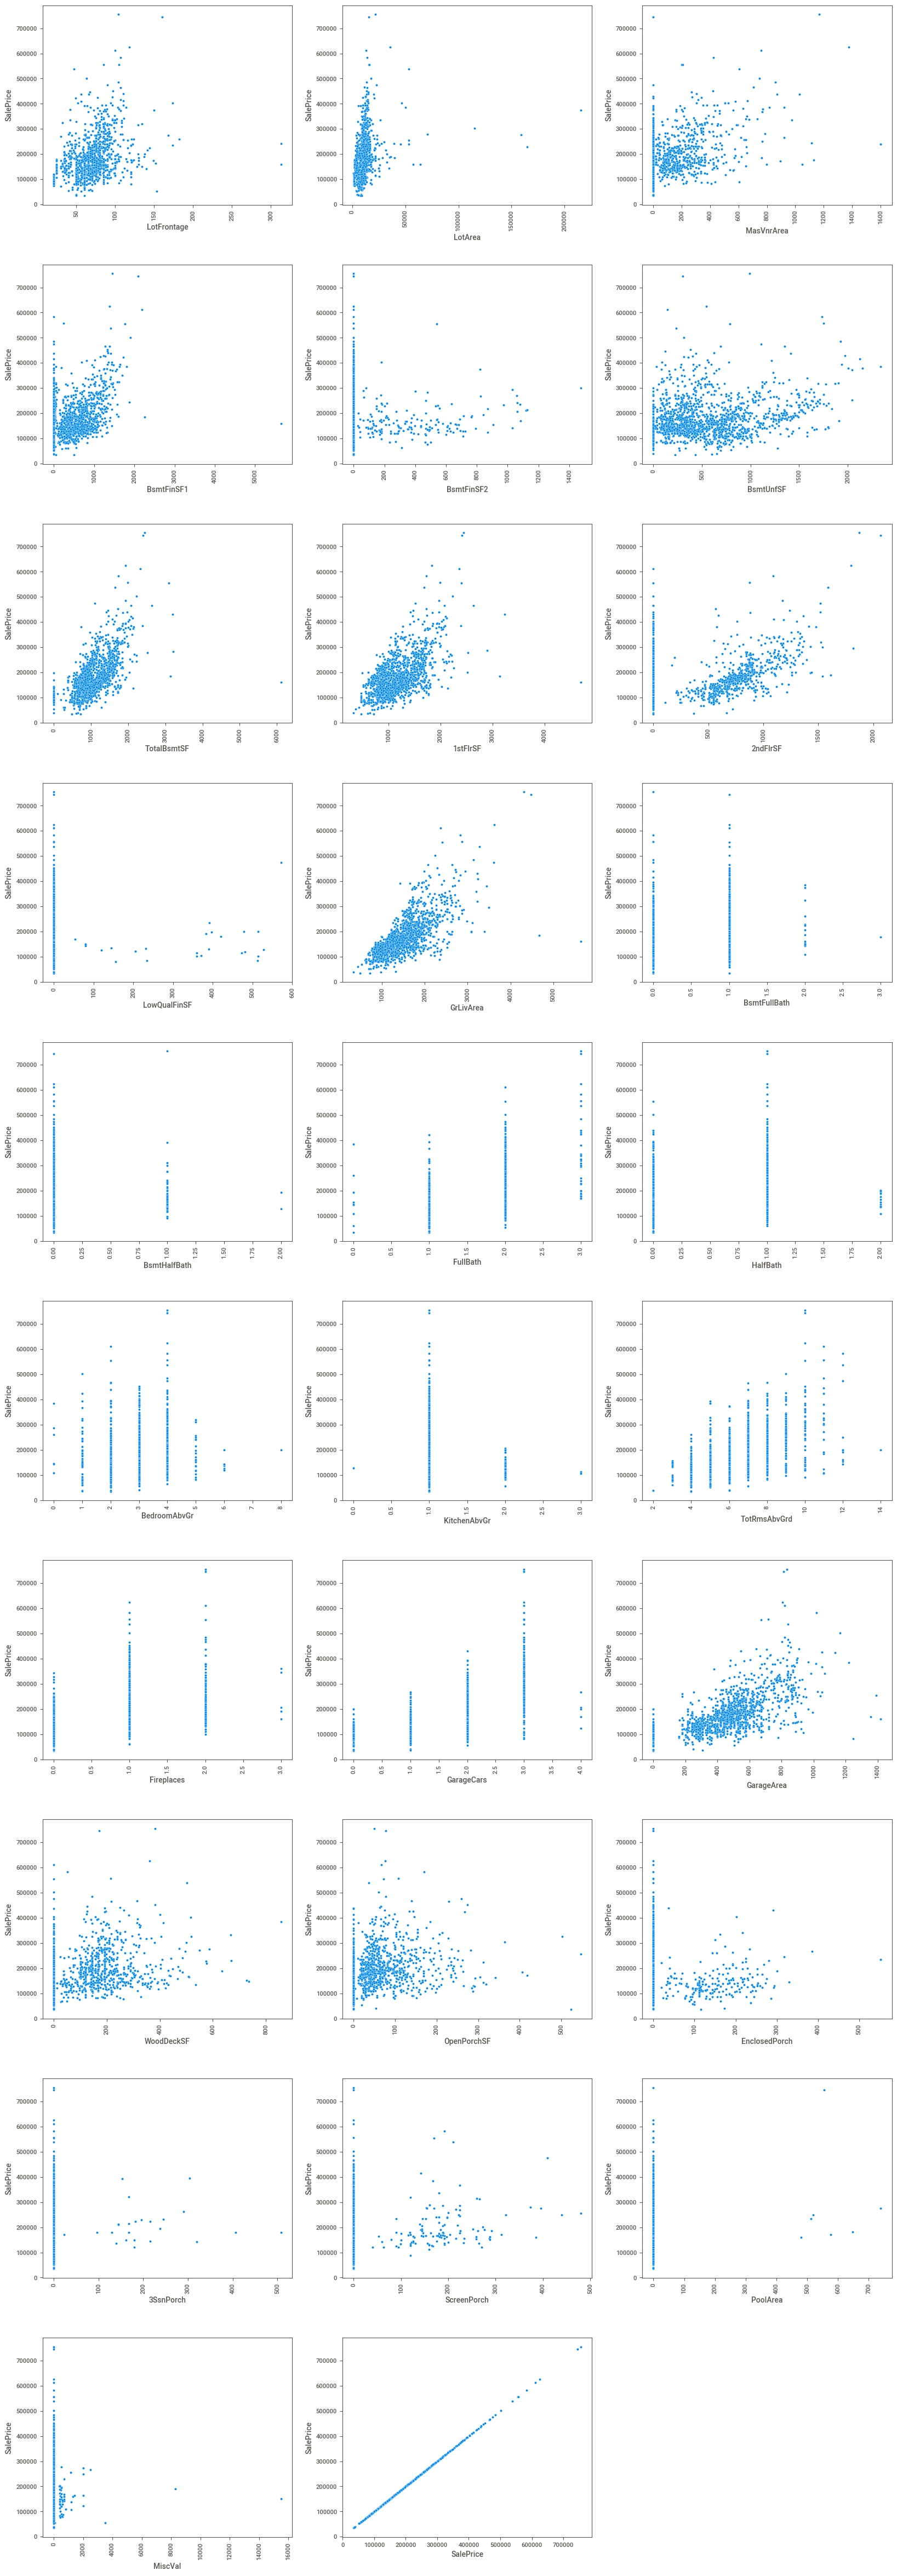

In [17]:
plt.figure(figsize=(20,60))

for i in continuous_var:
    plt.xticks(rotation=90)
    plt.subplot(10,3,continuous_var.index(i)+1)
    plt.subplots_adjust(hspace=0.3)
    sns.scatterplot(data=house,x=i,y='SalePrice')

## Step 3 Data preparation

In [18]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NONE,Reg,Lvl,AllPub,Inside,...,0,NONE,NONE,NONE,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NONE,Reg,Lvl,AllPub,FR2,...,0,NONE,NONE,NONE,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NONE,IR1,Lvl,AllPub,Inside,...,0,NONE,NONE,NONE,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NONE,IR1,Lvl,AllPub,Corner,...,0,NONE,NONE,NONE,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NONE,IR1,Lvl,AllPub,FR2,...,0,NONE,NONE,NONE,0,12,2008,WD,Normal,250000


`converting the categorical string objects into meaningful numerical values so that we can train model on it`

In [19]:
NA_VAR_1=['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond','PoolQC','ExterQual','ExterCond','HeatingQC','KitchenQual',]
for i in NA_VAR_1:
    house[i]=house[i].replace(['NONE','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])
    
house['BsmtExposure']=house['BsmtExposure'].replace(['NONE','No','Mn','Av','Gd'],[0,1,2,3,4])
house['GarageFinish']=house['GarageFinish'].replace(['NONE','Unf','RFn','Fin'],[0,1,2,3])

##for unordered categories which are having more than 3 categories, using number 0,10,20,30 etc.

house['BsmtFinType1']=house['BsmtFinType1'].replace(['NONE','GLQ','ALQ','BLQ','Rec','LwQ','Unf'],[0,10,20,30,40,50,60])
house['BsmtFinType2']=house['BsmtFinType2'].replace(['NONE','GLQ','ALQ','BLQ','Rec','LwQ','Unf'],[0,10,20,30,40,50,60])
house['GarageType']=house['GarageType'].replace(['NONE','2Types','Attchd','Basment','BuiltIn','CarPort','Detchd'],[0,10,20,30,40,50,60])
house['Fence']=house['Fence'].replace(['NONE','GdPrv','MnPrv','GdWo','MnWw'],[0,10,20,30,40])
house['MiscFeature']=house['MiscFeature'].replace(['NONE','Elev','Gar2','Othr','Shed','TenC'],[0,10,20,30,40,50])
##
MSZoning={'A':10,'C':20,'FV':30,'I':40,'RH':50,'RL':60,'RP':70,'RM':80,'C (all)':90}
LotShape={'Reg':10,'IR1':20,'IR2':30,'IR3':40}
LandContour={'Lvl':10,'Bnk':20,'HLS':30,'Low':40}
Utilities={'AllPub':10,'NoSewr':20,'NoSeWa':30,'ELO':40}
LotConfig={'Inside':10,'Corner':20,'CulDSac':30,'FR2':40,'FR3':50}
Neighborhood={'Blmngtn':10,'Blueste':20,'BrDale':30,'BrkSide':40,'ClearCr':50,'CollgCr':60,
              'Crawfor':70,'Edwards':80,'Gilbert':90,'IDOTRR':100,'MeadowV':110,'Mitchel':120,
              'NAmes':130,'NoRidge':140,'NPkVill':150,'NridgHt':160,'NWAmes':170,'OldTown':180,
              'SWISU':190,'Sawyer':200,'SawyerW':210,'Somerst':220,'StoneBr':230,'Timber':240,
              'Veenker':250}
Condition1={'Artery':10,'Feedr':20,'Norm':30,'RRNn':40,'RRAn':50,'PosN':60,'PosA':70,'RRNe':80,'RRAe':90}
Condition2={'Artery':10,'Feedr':20,'Norm':30,'RRNn':40,'RRAn':50,'PosN':60,'PosA':70,'RRNe':80,'RRAe':90}
BldgType={'1Fam':10,'2fmCon':20,'Duplex':30,'TwnhsE':40,'Twnhs':50}
HouseStyle={'1Story':10,'1.5Fin':20,'1.5Unf':30,'2Story':40,'2.5Fin':50,'2.5Unf':60,'SFoyer':70,'SLvl':80}
RoofStyle={'Flat':10,'Gable':20,'Gambrel':30,'Hip':40,'Mansard':50,'Shed':60}
RoofMatl={'ClyTile':10,'CompShg':20,'Membran':30,'Metal':40,'Roll':50,'Tar&Grv':60,'WdShake':70,'WdShngl':90}
Exterior1st={'AsbShng':10,'AsphShn':20,'BrkComm':30,'BrkFace':40,'CBlock':50,'CemntBd':60,'HdBoard':70,'ImStucc':80,
             'MetalSd':90,'Other':100,'Plywood':110,'PreCast':120,'Stone':130,'Stucco':140,'VinylSd':150,'Wd Sdng':160,'WdShing':170}
Exterior2nd={'AsbShng':10,'AsphShn':20,'Brk Cmn':30,'BrkFace':40,'CBlock':50,'CmentBd':60,'HdBoard':70,'ImStucc':80,
             'MetalSd':90,'Other':100,'Plywood':110,'PreCast':120,'Stone':130,'Stucco':140,'VinylSd':150,'Wd Sdng':160,'Wd Shng':170}
MasVnrType={'BrkCmn':10,'BrkFace':20,'CBlock':30,'NONE':40,'Stone':50}
Foundation={'BrkTil':10,'CBlock':20,'PConc':30,'Slab':40,'Stone':50,'Wood':60}
Heating={'Floor':10,'GasA':20,'GasW':30,'Grav':40,'OthW':50,'Wall':60}
CentralAir={'N':0,'Y':1}
Electrical={'SBrkr':10,'FuseA':20,'FuseF':30,'FuseP':40,'Mix':50}
Functional={'Typ':10,'Min1':20,'Min2':30,'Mod':40,'Maj1':50,'Maj2':60,'Sev':70,'Sal':80}
SaleType={'WD':10,'CWD':20,'VWD':30,'New':40,'COD':50,'Con':60,'ConLw':70,'ConLI':80,'ConLD':90,'Oth':100}
SaleCondition={'Normal':10,'Abnorml':20,'AdjLand':30,'Alloca':40,'Family':50,'Partial':60}
house=house.replace({'MSZoning':MSZoning,'LotShape':LotShape,'LandContour':LandContour,'Utilities':Utilities,
                     'LotConfig':LotConfig,'Neighborhood':Neighborhood,'Condition1':Condition1,'Condition2':Condition2,
                     'BldgType':BldgType,'HouseStyle':HouseStyle,'RoofStyle':RoofStyle,'RoofMatl':RoofMatl,
                     'Exterior1st':Exterior1st,'Exterior2nd':Exterior2nd,'MasVnrType':MasVnrType,'Foundation':Foundation,
                     'Heating':Heating,'CentralAir':CentralAir,'Electrical':Electrical,'Functional':Functional,
                     'SaleType':SaleType,'SaleCondition':SaleCondition})

In [20]:
##creating dummy variables for the features which has 3 or less than 3 unique values
Dum_var=['Street','Alley','LandSlope','PavedDrive']
Street=pd.get_dummies(house['Street'],drop_first=False)
Street.head(55)

,Grvl,Pave
Id,,
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


here, 
`01` = Paved
`10`= Gravel

In [21]:
Alley=pd.get_dummies(house['Alley'],drop_first=True)
Alley

,NONE,Pave
Id,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
1456,1,0
1457,1,0
1458,1,0


here, `00`=Gravel 
`10`=NoAccess
`01`=Paved

In [22]:
LandSlope=pd.get_dummies(house['LandSlope'],drop_first=True)
LandSlope

,Mod,Sev
Id,,
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
...,...,...
1456,0,0
1457,0,0
1458,0,0


here,`00`=Gentle slope
`10`=Moderate Slope
`01`=Severe Slope

In [23]:
PavedDrive=pd.get_dummies(house['PavedDrive'],drop_first=True)
PavedDrive

,P,Y
Id,,
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
1456,0,1
1457,0,1
1458,0,1


here,
`00`=Dirt/Gravel
`10`=Partial Pavement
`01`=Paved

In [24]:
house=pd.concat([house,Street,Alley,LandSlope,PavedDrive],axis=1)
house.drop(['Street','Alley','LandSlope','PavedDrive'],axis=1,inplace=True)

In [25]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,...,SaleCondition,SalePrice,Grvl,Pave,NONE,Pave,Mod,Sev,P,Y
Id,,,,,,,,,,,,,,,,,,,,,
1,60,60,65.0,8450,10,10,10,10,60,30,...,10,208500,0,1,1,0,0,0,0,1
2,20,60,80.0,9600,10,10,10,40,250,20,...,10,181500,0,1,1,0,0,0,0,1
3,60,60,68.0,11250,20,10,10,10,60,30,...,10,223500,0,1,1,0,0,0,0,1
4,70,60,60.0,9550,20,10,10,20,70,30,...,20,140000,0,1,1,0,0,0,0,1
5,60,60,84.0,14260,20,10,10,40,140,30,...,10,250000,0,1,1,0,0,0,0,1


In [26]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   int64  
 6   Utilities      1460 non-null   int64  
 7   LotConfig      1460 non-null   int64  
 8   Neighborhood   1460 non-null   int64  
 9   Condition1     1460 non-null   int64  
 10  Condition2     1460 non-null   int64  
 11  BldgType       1460 non-null   int64  
 12  HouseStyle     1460 non-null   int64  
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   int64  
 18  RoofMatl

In [27]:
house.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,...,SaleCondition,SalePrice,Grvl,Pave,NONE,Pave,Mod,Sev,P,Y
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,61.746575,70.049958,10516.828082,14.082192,11.856164,10.013699,14.164384,132.486301,30.308219,...,15.821918,180921.195890,0.004110,0.995890,0.937671,0.028082,0.044521,0.008904,0.020548,0.917808
std,42.300571,10.201743,24.284752,9981.264932,5.822961,6.065091,0.523424,7.734479,60.159001,8.783486,...,14.752091,79442.502883,0.063996,0.063996,0.241835,0.165264,0.206319,0.093973,0.141914,0.274751
min,20.000000,30.000000,21.000000,1300.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,59.000000,7553.500000,10.000000,10.000000,10.000000,10.000000,80.000000,30.000000,...,10.000000,129975.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,50.000000,60.000000,69.000000,9478.500000,10.000000,10.000000,10.000000,10.000000,130.000000,30.000000,...,10.000000,163000.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,70.000000,60.000000,80.000000,11601.500000,20.000000,10.000000,10.000000,20.000000,180.000000,30.000000,...,10.000000,214000.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,190.000000,90.000000,313.000000,215245.000000,40.000000,40.000000,30.000000,50.000000,250.000000,90.000000,...,60.000000,755000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


`using KNN imputer to fill the missing values`

In [28]:
Imputer=KNNImputer(n_neighbors=2)
After_impuration=Imputer.fit_transform(house)
house=pd.DataFrame(After_impuration,columns=house.columns)

In [29]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   LotShape       1460 non-null   float64
 5   LandContour    1460 non-null   float64
 6   Utilities      1460 non-null   float64
 7   LotConfig      1460 non-null   float64
 8   Neighborhood   1460 non-null   float64
 9   Condition1     1460 non-null   float64
 10  Condition2     1460 non-null   float64
 11  BldgType       1460 non-null   float64
 12  HouseStyle     1460 non-null   float64
 13  OverallQual    1460 non-null   float64
 14  OverallCond    1460 non-null   float64
 15  YearBuilt      1460 non-null   float64
 16  YearRemodAdd   1460 non-null   float64
 17  RoofStyle      1460 non-null   float64
 18  RoofMatl

## Step 4 splitting data into train and test

In [30]:
house_train, house_test=train_test_split(house,train_size=0.7,test_size=0.3,random_state=100)

In [31]:
#using min max scaler on train data

In [32]:
Scaling_var=house_train.columns

In [33]:
scaler=MinMaxScaler()
house_train[Scaling_var]=scaler.fit_transform(house_train[Scaling_var])
house_test[Scaling_var]=scaler.fit_transform(house_test[Scaling_var])

In [34]:
house_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,...,SaleCondition,SalePrice,Grvl,Pave,NONE,Pave,Mod,Sev,P,Y
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.226134,0.529546,0.169049,0.042143,0.137773,0.065295,0.000979,0.105534,0.509713,0.255509,...,0.109500,0.202113,0.003918,0.996082,0.937316,0.022527,0.045054,0.009794,0.020568,0.915769
std,0.254755,0.170296,0.081880,0.048226,0.199011,0.209996,0.031296,0.191911,0.248609,0.120445,...,0.285255,0.109835,0.062500,0.062500,0.242512,0.148462,0.207524,0.098529,0.142003,0.277870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.130137,0.027923,0.000000,0.000000,0.000000,0.000000,0.291667,0.250000,...,0.000000,0.131371,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.176471,0.500000,0.164384,0.037531,0.000000,0.000000,0.000000,0.000000,0.500000,0.250000,...,0.000000,0.173726,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.294118,0.500000,0.202055,0.046943,0.333333,0.000000,0.000000,0.250000,0.708333,0.250000,...,0.000000,0.248715,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
house_test.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,...,SaleCondition,SalePrice,Grvl,Pave,NONE,Pave,Mod,Sev,P,Y
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.195810,0.528158,0.173004,0.058914,0.131659,0.054033,0.0,0.099886,0.534048,0.333333,...,0.132877,0.250867,0.004566,0.995434,0.938356,0.041096,0.043379,0.006849,0.020548,0.922374
std,0.233634,0.169784,0.085035,0.058305,0.182274,0.182846,0.0,0.196173,0.267071,0.106370,...,0.316685,0.139977,0.067496,0.067496,0.240783,0.198739,0.203942,0.082571,0.142027,0.267887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.133562,0.040913,0.000000,0.000000,0.0,0.000000,0.304348,0.333333,...,0.000000,0.164225,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.176471,0.500000,0.167808,0.051284,0.000000,0.000000,0.0,0.000000,0.521739,0.333333,...,0.000000,0.221653,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.235294,0.500000,0.202055,0.065948,0.333333,0.000000,0.0,0.250000,0.739130,0.333333,...,0.000000,0.305465,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


`by seeing the above summary we can see that all the variables are having same scale and values are between 0 to 1`

## Step 5 Model building

In [36]:
#dividing dataset into X and y for model building

In [37]:
X_train=house_train.drop('SalePrice',axis=1)
y_train=house_train['SalePrice']
X_test=house_test.drop('SalePrice',axis=1)
y_test=house_test['SalePrice']

In [38]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,...,SaleType,SaleCondition,Grvl,Pave,NONE,Pave,Mod,Sev,P,Y
210,0.058824,0.500000,0.157534,0.019306,0.0,0.0,0.0,0.00,0.291667,0.250,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
318,0.235294,0.500000,0.236301,0.039403,0.0,1.0,0.0,0.00,0.541667,0.250,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
239,0.176471,0.500000,0.106164,0.033981,0.0,0.0,0.0,0.00,0.291667,0.250,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
986,0.176471,0.833333,0.130137,0.017931,0.0,0.0,0.0,0.25,0.708333,0.125,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1416,1.000000,0.833333,0.133562,0.046139,0.0,0.0,0.0,0.00,0.708333,0.250,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### LINEAR REGRESSION

In [39]:
lr=LinearRegression()

In [40]:
lin_reg=lr.fit(X_train,y_train)

In [41]:
print(lin_reg.intercept_)
lin_reg_coef=lin_reg.coef_
print(lin_reg_coef)

403857502968.2211
[-2.61169819e-02 -1.75657875e-02 -3.55817493e-02  9.42948907e-02
 -4.81157300e-03 -1.31500288e-02 -7.23360966e-02 -1.72415274e-04
  1.27813462e-02 -1.44969319e-02 -1.56012999e-01 -1.67567188e-02
 -2.94976562e-02  1.52406047e-01  6.00424386e-02  1.61677157e-02
 -1.70092969e-03  1.62569259e-02  5.49936352e-02 -6.97136774e-04
 -1.23794983e-02  1.04276836e-02  7.83772704e-02  2.66962582e-02
 -5.81331653e-03  1.48982539e-02  7.91593886e-02 -3.79245081e-02
  4.48822135e-02 -2.37210038e-02 -5.87796374e+11 -1.36236615e-02
 -1.53510251e+11 -2.43283545e+11  6.36328109e+11  8.42690766e-03
  1.41120361e-02 -5.58780788e-04  5.04727346e-03 -6.65978477e+11
 -3.18343879e+11 -7.93932675e+10  8.02257406e+11  3.69338266e-02
  4.25535516e-03  1.21808963e-02  1.16991697e-02 -2.50107639e-02
 -3.43831213e-02  3.62479315e-02  2.79020353e-02 -3.49150543e-02
  5.25455308e-03  1.31213250e-02 -1.80849717e-03 -7.77921345e-03
  2.40115380e-03  6.60514212e-02  1.32986409e-02  2.04200001e-02
 -6.387

In [42]:
y_train_pred=lin_reg.predict(X_train)
y_test_pred=lin_reg.predict(X_test)

In [43]:
r2_train_lr=r2_score(y_train, y_train_pred)
print(r2_train_lr)

0.8435221810833237


In [44]:
r2_test_lr=r2_score(y_test, y_test_pred)
print(r2_test_lr)

-3.164996742882516e+23


### Ridge and Lasso Regression

### Lasso Regression

In [45]:
params=[{'alpha':[0.0001,0.001,0.002,0.005,0.008,0.009,
          0.01,0.02,0.05,0.08,0.09,
          0.1,0.2,0.5,0.8,0.9,
          1,2,5,8,9,
          10,20,30,40,50,100,500,1000]}]

In [46]:
lasso=Lasso()
folds=5
model_CV_LS=GridSearchCV(lasso,
                         param_grid=params,
                         scoring='neg_root_mean_squared_error',
                         cv=folds,
                         return_train_score=True,
                         verbose=1)
model_CV_LS.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.002, 0.005, 0.008, 0.009,
                                    0.01, 0.02, 0.05, 0.08, 0.09, 0.1, 0.2, 0.5,
                                    0.8, 0.9, 1, 2, 5, 8, 9, 10, 20, 30, 40, 50,
                                    100, 500, 1000]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [47]:
print(model_CV_LS.best_params_)

{'alpha': 0.0001}


In [48]:
ls=Lasso(alpha=0.0001)
ls.fit(X_train,y_train)
ls_coef=ls.coef_
print(ls_coef)

[-2.16319011e-02 -1.75309632e-02 -0.00000000e+00  1.92560079e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  7.91228628e-03 -1.61586144e-03 -5.43562163e-02 -1.87115040e-02
 -2.88762101e-02  1.59691081e-01  4.02572098e-02  0.00000000e+00
  4.11030514e-03  1.43250799e-02  5.63624919e-02 -0.00000000e+00
 -1.18571433e-02  9.11648583e-03  7.54155521e-02  3.52918153e-02
 -0.00000000e+00  1.21715586e-02  6.53036645e-02 -1.99275662e-02
  4.26173535e-02 -2.32584594e-02  0.00000000e+00 -8.76708557e-03
 -0.00000000e+00  3.48263199e-03  0.00000000e+00  0.00000000e+00
  8.45710969e-03 -0.00000000e+00  2.78735282e-05  0.00000000e+00
  1.03189314e-02 -8.83307059e-03  3.04893265e-01  2.79200689e-02
  0.00000000e+00  1.71220271e-02  6.16080503e-03 -0.00000000e+00
 -1.51179305e-02  3.86403420e-02  1.16645084e-02 -2.83349737e-02
  8.57173808e-03  1.41049752e-02 -4.86582831e-03 -0.00000000e+00
  4.98021663e-03  6.43695333e-02  0.00000000e+00 -0.00000000e+00
 -2.27953038e-02  1.16326

In [49]:
y_pred_trainLS=ls.predict(X_train)
y_pred_testLS=ls.predict(X_test)

In [50]:
r2_train_ls=r2_score(y_train,y_pred_trainLS)
r2_test_ls=r2_score(y_test,y_pred_testLS)
print(r2_train_ls,r2_test_ls)

0.8389325408358878 0.8233906588591804


`for subjective question`
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [51]:
ls1=Lasso(alpha=0.0002)
ls1.fit(X_train,y_train)
ls1_coef=ls1.coef_
print(ls1_coef)

[-0.02009442 -0.0158367  -0.          0.          0.          0.
 -0.          0.          0.00578336 -0.         -0.         -0.02139358
 -0.0269205   0.16299017  0.0256494   0.          0.00670251  0.0119927
  0.04293184 -0.         -0.01059708  0.00685743  0.06974229  0.03730663
 -0.          0.00715879  0.05282434 -0.00305507  0.04359008 -0.02390258
  0.         -0.00724821 -0.          0.          0.          0.
  0.00727    -0.          0.          0.          0.00957    -0.
  0.30229763  0.02335307  0.          0.01443626  0.00476977 -0.
 -0.          0.0403063   0.00565209 -0.02001033  0.00687806  0.01702268
 -0.00764387  0.          0.00492384  0.06061511  0.         -0.
 -0.00903974  0.0103455  -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.          0.         -0.
 -0.00330018 -0.          0.00788633 -0.          0.          0.00678731
 -0.          0.00188711  0.00555821  0.         -0.        ]


In [52]:
y_pred_trainLS1=ls1.predict(X_train)
y_pred_testLS1=ls1.predict(X_test)

In [53]:
r2_train_ls1=r2_score(y_train,y_pred_trainLS1)
r2_test_ls1=r2_score(y_test,y_pred_testLS1)
print(r2_train_ls1,r2_test_ls1)

0.8335048868096216 0.8292429511860326


### Ridge Regression

In [54]:
ridge=Ridge()
folds=5
model_CV_Rd=GridSearchCV(ridge,
                         param_grid=params,
                         scoring='neg_root_mean_squared_error',
                         cv=folds,
                         return_train_score=True,
                         verbose=1)
model_CV_Rd.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.002, 0.005, 0.008, 0.009,
                                    0.01, 0.02, 0.05, 0.08, 0.09, 0.1, 0.2, 0.5,
                                    0.8, 0.9, 1, 2, 5, 8, 9, 10, 20, 30, 40, 50,
                                    100, 500, 1000]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [55]:
print(model_CV_Rd.best_params_)

{'alpha': 5}


In [56]:
Rd=Ridge(alpha=5)
Rd.fit(X_train,y_train)
Rd_coef=Rd.coef_
print(Rd_coef)

[-0.01949029 -0.01385126 -0.00080864  0.02425878 -0.00184177 -0.00321549
 -0.00996637  0.00031724  0.01284875 -0.00683274 -0.02597788 -0.01975419
 -0.02642644  0.11557628  0.03699728  0.00066306  0.00869526  0.02238754
  0.04746959 -0.00232162 -0.00994302  0.00644632  0.06349582  0.0407367
 -0.00458684  0.01598387  0.05488147 -0.01674499  0.04458188 -0.02543244
  0.02434668 -0.01104795  0.00401048  0.02164105  0.03173119  0.00561011
  0.00975208 -0.00060562  0.00648228  0.0630462   0.06839981 -0.00031916
  0.07944674  0.02873754  0.00154211  0.03302815  0.01291115 -0.00622246
 -0.0219374   0.04388046  0.04564076 -0.02346337  0.01844482  0.01649285
 -0.00674594 -0.00387237  0.00914427  0.04610092  0.03128341 -0.0055626
 -0.0172281   0.01773446 -0.00362825 -0.00084577  0.01169495  0.00810435
 -0.00409663  0.00190586 -0.00210392 -0.00283756  0.00012158 -0.00235451
 -0.00641683 -0.00061178  0.01032494 -0.00549536  0.00549536  0.0091467
  0.00102582  0.0086883   0.01546299  0.0090926   0.00

In [57]:
y_pred_trainRd=Rd.predict(X_train)
y_pred_testRd=Rd.predict(X_test)

In [58]:
r2_train_Rd=r2_score(y_train,y_pred_trainRd)
r2_test_Rd=r2_score(y_test,y_pred_testRd)
print(r2_train_Rd)
print(r2_test_Rd)

0.8345003383239946
0.8348113360022165


`for subjective question`
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [59]:
#for subjective question
Rd1=Ridge(alpha=10)
Rd1.fit(X_train,y_train)
Rd1_coef=Rd1.coef_
print(Rd1_coef)

[-0.01851507 -0.01157947  0.00574874  0.01681933 -0.00062148  0.00056414
 -0.00573908  0.0011126   0.01319723 -0.00545674 -0.01351089 -0.01962158
 -0.02282809  0.09519837  0.02744031  0.00195329  0.01140431  0.02331482
  0.03537204 -0.00289477 -0.00831078  0.00429546  0.05382272  0.04328395
 -0.00252301  0.0140783   0.04652059 -0.00839357  0.04407957 -0.02596321
  0.0221346  -0.00848654  0.00407712  0.02084058  0.02939786  0.0042113
  0.01078285 -0.00066079  0.00507162  0.04945671  0.05974962  0.00073273
  0.0648373   0.02550223  0.0007399   0.03471585  0.01525166  0.00132763
 -0.01481263  0.04555821  0.04513887 -0.01793698  0.01947096  0.02131163
 -0.0079742  -0.00042135  0.01167919  0.04174828  0.03327849 -0.00464815
 -0.01102389  0.01828974  0.00116455  0.0003578   0.00765703  0.00785925
  0.00021298  0.00397249 -0.00296622 -0.00353804 -0.00050277 -0.00197085
 -0.00573234  0.00040572  0.010563   -0.00352247  0.00352247  0.00760746
  0.0013582   0.00725459  0.01205314  0.00703739  0.

In [60]:
y_pred_trainRd1=Rd1.predict(X_train)
y_pred_testRd1=Rd1.predict(X_test)

In [61]:
r2_train_Rd1=r2_score(y_train,y_pred_trainRd1)
r2_test_Rd1=r2_score(y_test,y_pred_testRd1)
print(r2_train_Rd1)
print(r2_test_Rd1)

0.8257739126634606
0.8237201834891718


Comparison of R2 score for linear,lasso and ridge regression

In [62]:
R2_score={'Linear':[r2_train_lr,r2_test_lr],'Lasso':[r2_train_ls,r2_test_ls],'Ridge':[r2_train_Rd,r2_test_Rd],'Lasso_1':[r2_train_ls1,r2_test_ls1],'Ridge_1':[r2_train_Rd1,r2_test_Rd1]}
Summary_table=pd.DataFrame(R2_score)

In [63]:
Summary_table

,Linear,Lasso,Ridge,Lasso_1,Ridge_1
0,8.435222e-01,0.838933,0.834500,0.833505,0.825774
1,-3.164997e+23,0.823391,0.834811,0.829243,0.823720


In [64]:
Coeff={'Linear coefficient':lin_reg_coef,'Lasso coefficient':ls_coef,'Ridge coefficient':Rd_coef,'Lasso1 coefficient':ls1_coef,'Ridge1 coefficient':Rd1_coef}
Coefficient_table=pd.DataFrame(Coeff)
Coefficient_table.head(20)

,Linear coefficient,Lasso coefficient,Ridge coefficient,Lasso1 coefficient,Ridge1 coefficient
0,-0.026117,-0.021632,-0.019490,-0.020094,-0.018515
1,-0.017566,-0.017531,-0.013851,-0.015837,-0.011579
2,-0.035582,-0.000000,-0.000809,-0.000000,0.005749
3,0.094295,0.019256,0.024259,0.000000,0.016819
4,-0.004812,-0.000000,-0.001842,0.000000,-0.000621
5,-0.013150,-0.000000,-0.003215,0.000000,0.000564
6,-0.072336,-0.000000,-0.009966,-0.000000,-0.005739
7,-0.000172,-0.000000,0.000317,0.000000,0.001113
8,0.012781,0.007912,0.012849,0.005783,0.013197
9,-0.014497,-0.001616,-0.006833,-0.000000,-0.005457


In [65]:
Coefficient_table.tail(20)

,Linear coefficient,Lasso coefficient,Ridge coefficient,Lasso1 coefficient,Ridge1 coefficient
63,-3.709308e-03,-0.000000,-0.000846,-0.000000,0.000358
64,3.614864e-02,0.000000,0.011695,0.000000,0.007657
65,7.907446e-03,0.003457,0.008104,0.000000,0.007859
66,-1.226574e-01,-0.000000,-0.004097,-0.000000,0.000213
67,9.430304e-02,-0.000000,0.001906,-0.000000,0.003972
68,1.735991e-03,-0.000000,-0.002104,-0.000000,-0.002966
69,-9.422402e-04,-0.000000,-0.002838,-0.000000,-0.003538
70,7.010614e-02,0.000000,0.000122,0.000000,-0.000503
71,-2.995679e-03,-0.001084,-0.002355,-0.000000,-0.001971
72,-7.536396e-03,-0.005164,-0.006417,-0.003300,-0.005732
